# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [32]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.07261148 2.13655338 2.54505116 2.17755147 2.34307258 2.91449015
 2.93229484 2.16490814 2.92562833 2.04371608]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

[2.81379376 2.51542657 2.49362714 2.13616618 2.57499498 2.63007078
 2.54391327 2.04051711 2.64718575 2.50411469]


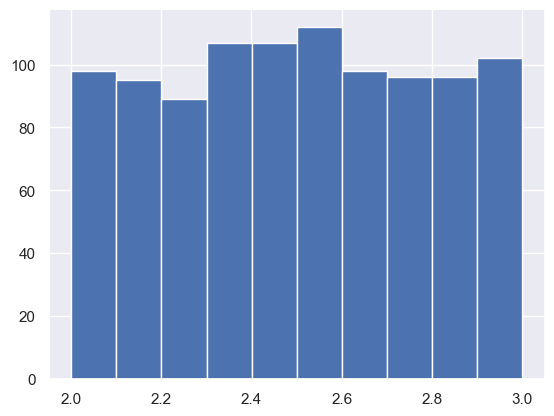

In [33]:
from scipy.stats import uniform
def my_randoms(bottom, ceiling, count):
    x = uniform.rvs(size=count)
    return bottom + (ceiling-bottom)*x

print(my_randoms(2, 3, 10))

import matplotlib.pyplot as plt
plt.hist(my_randoms(2, 3, 1000), bins=10)
plt.show()

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

[10.53231757 10.31216406  9.65134655  8.87640802  8.91868802  9.12386604
 10.15965572 12.41926258  9.82275671 10.0622588   9.93064916  6.61188355
 10.4037399  10.10585862  9.58336948 11.57681813 10.74333898 11.88126663
  9.40718871  7.65592561 11.62797665  7.25617248 12.25146403  9.19825911
  9.53625323 11.34432228  9.92769136 10.15007439  9.35592277  8.10180859
  9.08000901 10.32436498 10.42921429 10.56005914 10.2941081   9.81869135
 11.46118765 11.04849889 10.23406859 11.75955022 10.55432263 10.79743596
  9.64113244 10.89336739  8.67508957 10.46788285 10.26879718 11.79755482
  8.40324349 10.29235899  9.75320316 10.0968431  12.45329213  8.82312496
  9.9376515  12.23333284  9.62311349 11.23592332 10.78377249 11.12401803
  8.90819451 10.02538373 12.58259998 10.01878313 10.77575178  9.13003353
 11.04447103 11.15636079 10.18886933  9.34163529  8.19883726 11.22814624
 12.44400814 10.42055193  9.52388737 10.80868949 10.09755544  9.33716211
  8.6957269  10.67866778  7.86248671  9.61246037  9

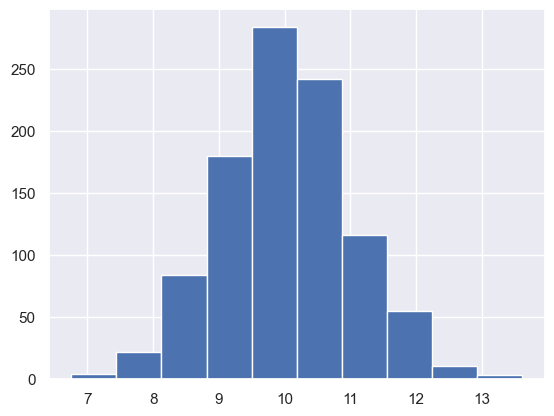

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def my_randoms(mean, std, count):
    return np.random.normal(mean, std, count)

print(my_randoms(10, 1, 1000))
print(my_randoms(10, 50, 1000))

plt.hist(my_randoms(10, 1, 1000), bins=10)
plt.show()

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

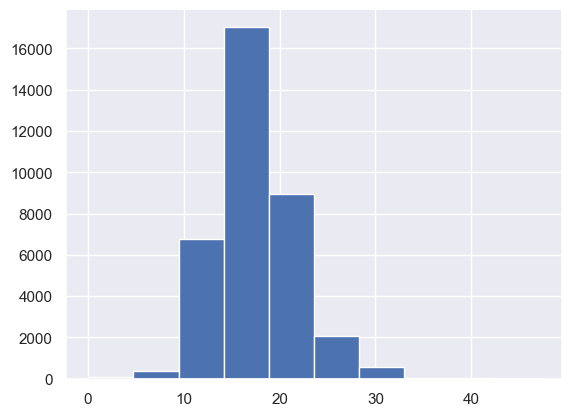

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('vehicles.csv')
plt.hist(df['Fuel Barrels/Year'], bins=10)
plt.show()


2. CO2 Emission Grams/Mile 

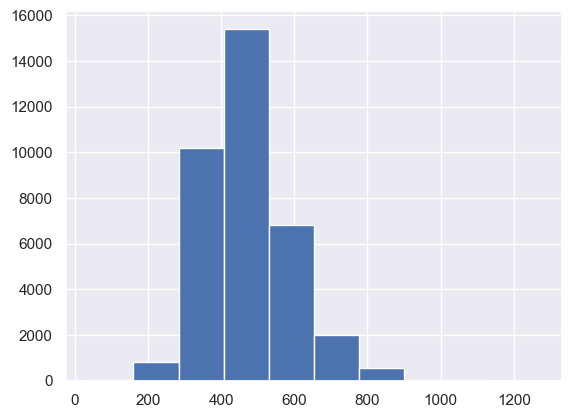

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('vehicles.csv')
plt.hist(df['CO2 Emission Grams/Mile'], bins=10)
plt.show()


3. Combined MPG

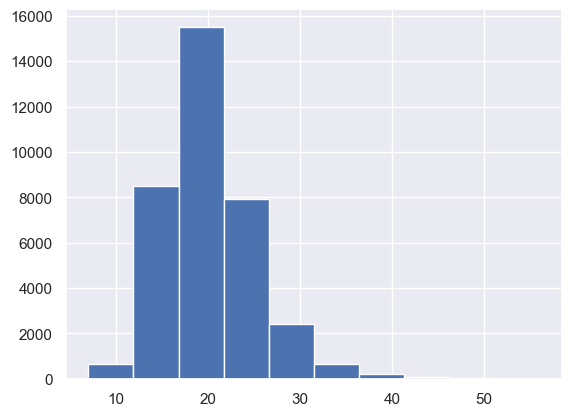

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('vehicles.csv')
plt.hist(df['Combined MPG'], bins=10)
plt.show()


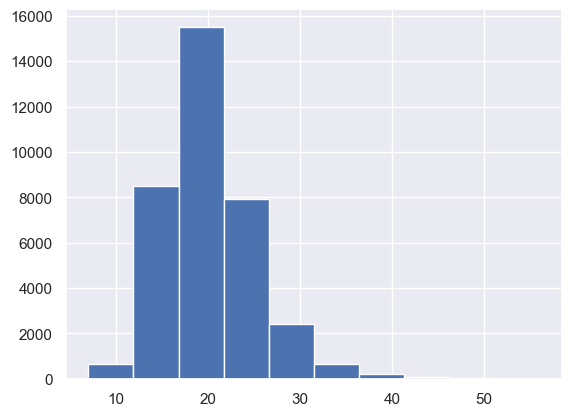

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('vehicles.csv')
plt.hist(df['Combined MPG'], bins=10)
plt.show()

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 1 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

[4.78793625 1.69461796 0.51069219 0.14010553 0.32831974 0.09481079
 1.45059843 0.15836832 0.23040787 0.25222422 0.23206465 0.04829889
 0.68384272 1.37087163 4.4881822  2.26188509 0.44512448 0.51549501
 0.26861222 1.01480047 0.0257119  0.04575153 0.10203473 0.96182688
 0.83801934 0.33873647 0.87829627 1.36815392 1.05536737 0.62958469
 0.96284245 1.54237177 0.41071614 0.28416432 0.01878301 0.38801055
 0.35137215 1.1925408  2.15555543 0.3976934  0.60544412 0.13763684
 0.68851582 0.15737425 0.52924264 0.52152983 1.52167041 0.26988689
 1.80699473 1.24891416 3.27752094 2.69557574 2.1496782  0.38709058
 0.54351469 1.11080049 0.75877401 0.78215765 0.99692542 0.72990324
 0.51200631 0.59929404 0.01235123 2.68348043 3.1271915  0.47258397
 0.55617218 2.9224447  1.6877096  1.15206715 0.24698834 0.66035918
 1.73879833 0.32944608 0.78398159 0.25044916 1.69888594 0.24398515
 0.53117318 0.71010867 0.67153529 1.67938107 0.1977241  1.50763891
 0.36142167 1.2348868  0.02874697 0.23432991 2.9610571  0.3538

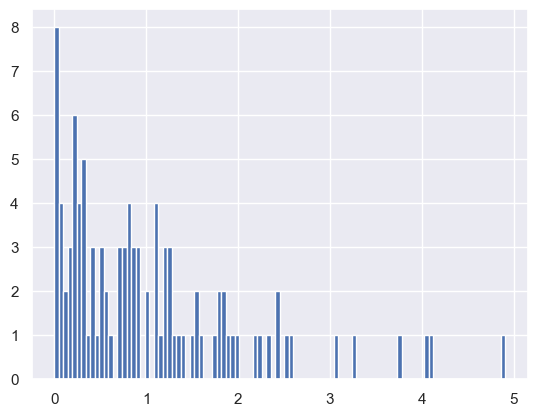

In [39]:
import numpy as np
import matplotlib.pyplot as plt
def my_randoms(mean, count):
    return np.random.exponential(mean, count)
print(my_randoms(1, 100))
plt.hist(my_randoms(1, 100), bins=100)
plt.show()

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

[0.30204369 1.71869324 2.52902366 1.23678499 0.01950743 0.23880298
 0.59298846 2.9256251  0.58396429 1.43832924 1.26831604 2.13876057
 0.20264491 0.32919755 1.76543991 1.66347636 0.17554859 4.20171298
 0.83583854 0.16695941 0.25255726 2.20175549 0.03929163 2.09993209
 1.02619854 1.4658562  1.3690148  0.37760559 0.72818246 0.21668545
 0.24478686 3.94592957 2.95233523 0.05845448 0.13097308 1.74038019
 0.15586301 0.31792384 0.34512207 0.22912316 0.37883661 0.46006819
 0.28606373 2.95789914 2.44607776 1.92649668 4.06357259 0.75382316
 1.16952501 0.22679257 2.51916793 0.54274108 1.68297744 0.54912091
 1.70037837 1.33394616 2.94972265 1.45622223 0.65808726 1.27230473
 0.13301131 0.84986517 0.21858568 0.25362111 0.59260074 2.35024388
 1.19792143 0.09716053 0.16827504 0.17518914 0.91291804 0.86865794
 0.23327766 1.29135023 0.6839302  1.56991014 0.48986756 1.35829203
 1.93255646 1.73969733 0.24632249 1.2437046  2.59020379 4.04377221
 0.01119742 1.64823261 3.17472759 0.85166767 0.50878438 0.8222

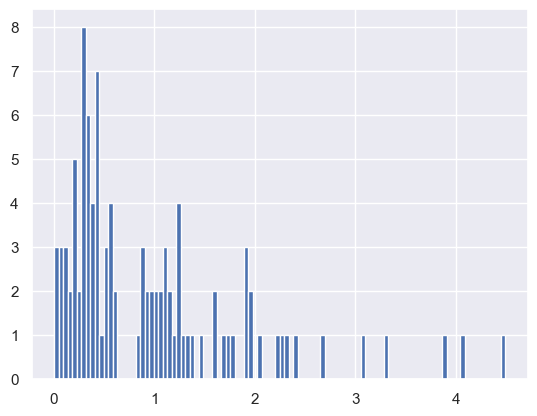

In [40]:
import numpy as np
import matplotlib.pyplot as plt
def my_randoms(mean, count):
    return np.random.exponential(mean, count)
print(my_randoms(1, 100))
plt.hist(my_randoms(1, 100), bins=100)
plt.show()